In [44]:
import json
import time
from collections import Counter
from datetime import datetime

import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

from src.data.make_dataset import CONSPIRACY_SUBREDDITS, DEFAULT_SUBREDDITS

In [4]:
cntr= Counter()
cntr_ct = Counter()
cntr_default = Counter()
with open('../data/interim/labeling_contributions_preprocessed_no_bot.jsonl', encoding='utf8') as f:
    for contribution in map(json.loads, f):
        timestamp = contribution.get('created_utc', None)
        if timestamp:
            timestamp = datetime.fromtimestamp(float(timestamp))
            truncated_timestamp = time.mktime(timestamp.date().timetuple())
            cntr[truncated_timestamp]+=1
            if contribution.get('subreddit', None) in CONSPIRACY_SUBREDDITS:
                cntr_ct[truncated_timestamp]+=1
            elif contribution.get('subreddit', None) in DEFAULT_SUBREDDITS:
                cntr_default[truncated_timestamp]+=1

In [76]:
df = pd.DataFrame({'all':pd.Series(cntr, name='all'),
              'conspiracy':pd.Series(cntr_ct, name='conspiracy'),
              'default':pd.Series(cntr_default, name='default')},)

In [77]:
df.tail()

,all,conspiracy,default
1.677280e+09,513,52.0,33.0
1.677366e+09,639,44.0,106.0
1.677452e+09,903,61.0,117.0
1.677539e+09,699,60.0,51.0
1.677625e+09,27,1.0,1.0


In [78]:
df = df.reset_index(names='day_timestamp')
df['day_datetime'] = df.day_timestamp.apply(lambda x:datetime.fromtimestamp(x))

In [79]:
df.fillna(0, inplace=True)
del df['day_timestamp']

In [80]:
df = df.set_index('day_datetime')

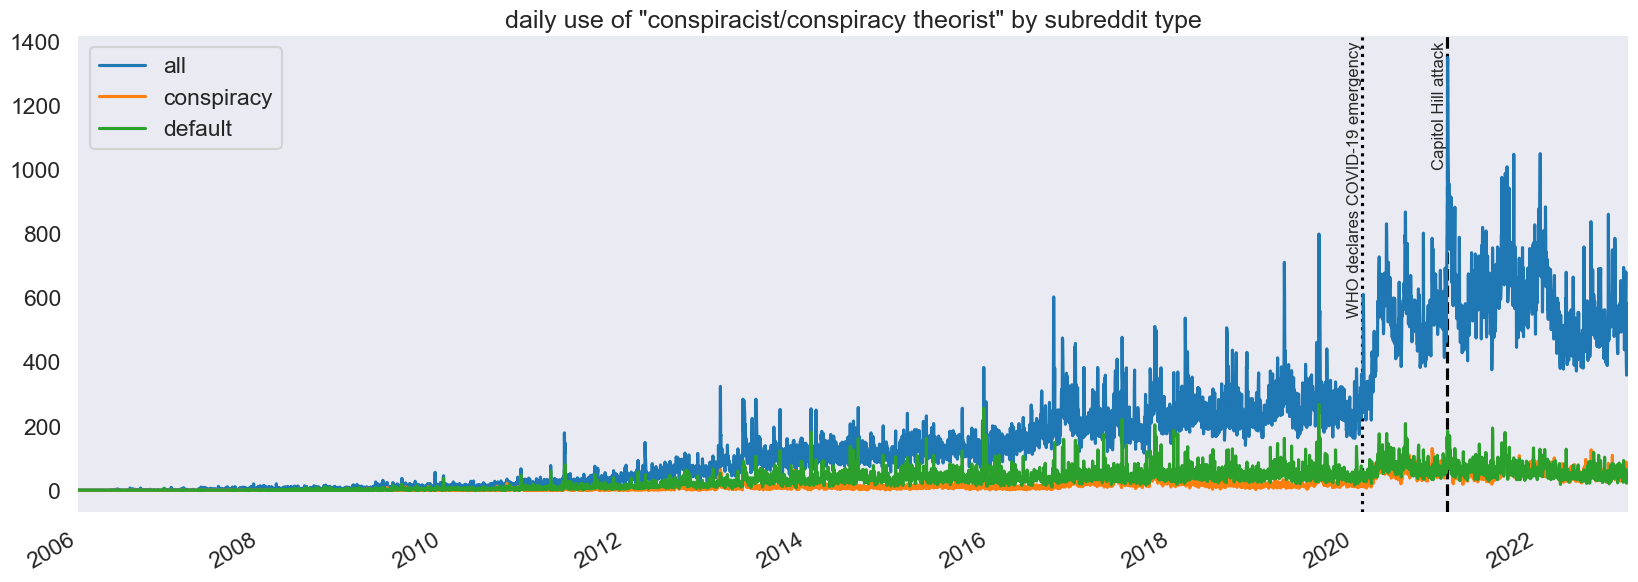

In [110]:
with sns.plotting_context("talk"):
    ax = df.plot(figsize=(20, 7))
    _ = ax.set_title('daily use of "conspiracist/conspiracy theorist" by subreddit type')
    _ = ax.set_xlabel('')
    plt.axvline(x = datetime.fromisoformat('2021-01-06'), color = 'k', ls='--', zorder=0)
    plt.axvline(x = datetime.fromisoformat('2020-01-30'), color = 'k', ls=':', zorder=0)
    plt.annotate('Capitol Hill attack', xy=(datetime.fromisoformat('2021-01-06'), 1400), rotation=90, va='top', ha='right', fontsize=12)
    plt.annotate('WHO declares COVID-19 emergency', xy=(datetime.fromisoformat('2020-01-30'), 1400), rotation=90, va='top', ha='right', fontsize=12)
    sns.despine(ax=ax, left=True, bottom=True)
    ax.grid(False)
    ax.set_xlim(datetime.fromisoformat('2006-01-01'), datetime.fromisoformat('2023-01-01'), )
    plt.legend(loc='upper left')
    plt.savefig('../reports/figures/count_daily_labeling.png', bbox_inches='tight', dpi=600)

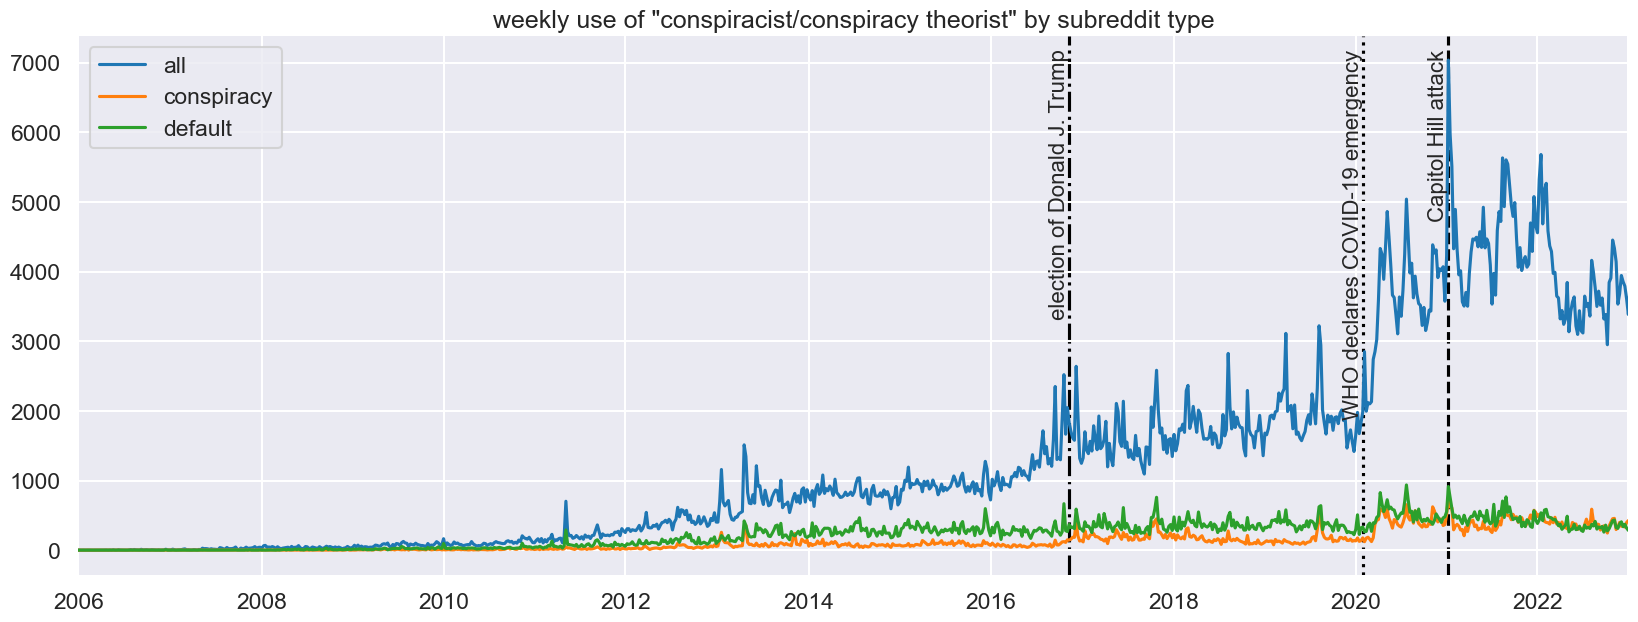

In [113]:
with sns.plotting_context("talk"):
    ax = df.resample('w').sum().plot(figsize=(20, 7))
    _ = ax.set_title('weekly use of "conspiracist/conspiracy theorist" by subreddit type')
    _ = ax.set_xlabel('')
    plt.axvline(x = datetime.fromisoformat('2021-01-06'), color = 'k', ls='--', zorder=0)
    plt.axvline(x = datetime.fromisoformat('2020-01-30'), color = 'k', ls=':', zorder=0)
    plt.axvline(x = datetime.fromisoformat('2016-11-08'), color = 'k', ls='-.', zorder=0)
    plt.annotate('Capitol Hill attack', xy=(datetime.fromisoformat('2021-01-06'), 7200), rotation=90, va='top', ha='right', fontsize=16)
    plt.annotate('WHO declares COVID-19 emergency', xy=(datetime.fromisoformat('2020-01-30'), 7200), rotation=90, va='top', ha='right', fontsize=16)
    plt.annotate('election of Donald J. Trump', xy=(datetime.fromisoformat('2016-11-08'), 7200), rotation=90, va='top', ha='right', fontsize=16)
    sns.despine(ax=ax, left=True, bottom=True)
    # ax.grid(False)
    ax.set_xlim(datetime.fromisoformat('2006-01-01'), datetime.fromisoformat('2023-01-01'), )
    plt.legend(loc='upper left')
    plt.savefig('../reports/figures/count_weekly_labeling.png', bbox_inches='tight', dpi=600)

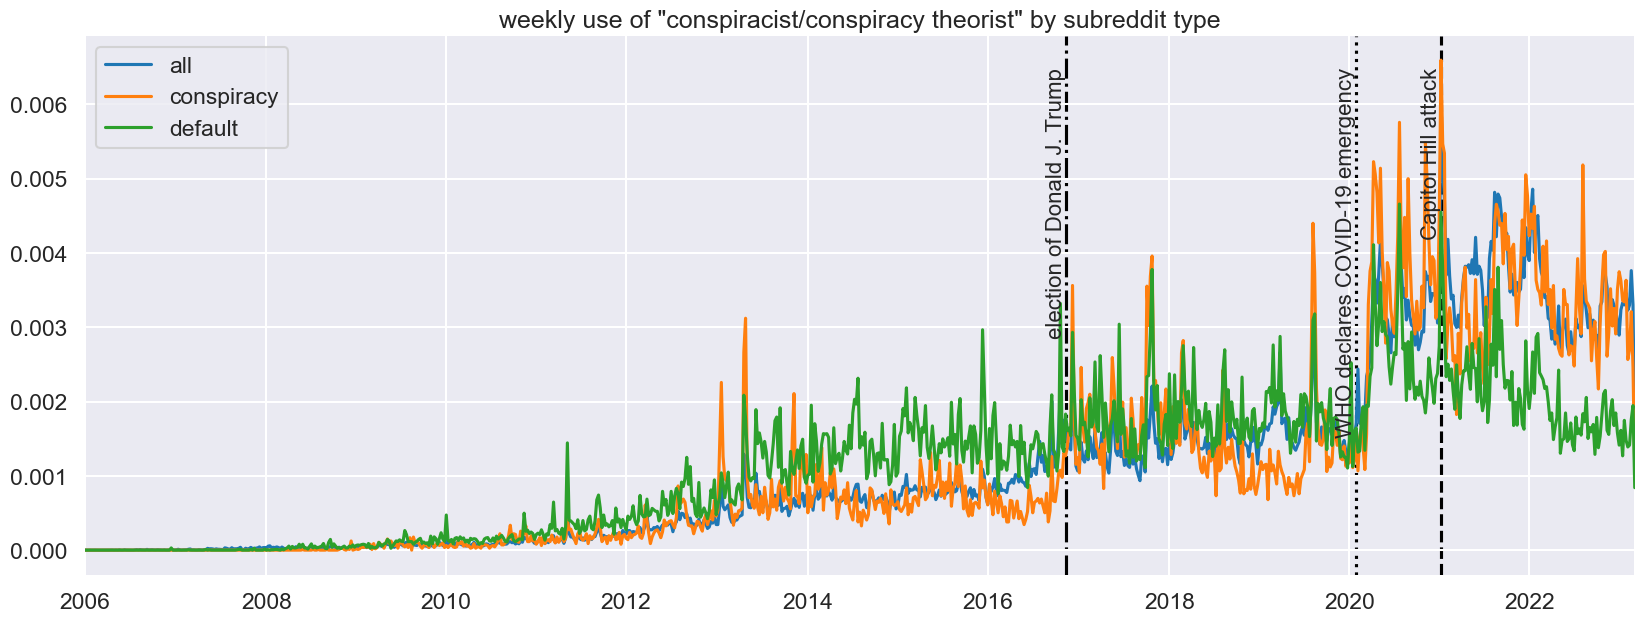

In [119]:
with sns.plotting_context("talk"):
    toplot = df.resample('w').sum()
    toplot['all'] = toplot['all']/toplot['all'].sum()
    toplot['conspiracy'] = toplot['conspiracy']/toplot['conspiracy'].sum()
    toplot['default'] = toplot['default']/toplot['default'].sum()
    ax = toplot.plot(figsize=(20, 7))
    _ = ax.set_title('weekly use of "conspiracist/conspiracy theorist" by subreddit type')
    _ = ax.set_xlabel('')
    plt.axvline(x = datetime.fromisoformat('2021-01-06'), color = 'k', ls='--', zorder=0)
    plt.axvline(x = datetime.fromisoformat('2020-01-30'), color = 'k', ls=':', zorder=0)
    plt.axvline(x = datetime.fromisoformat('2016-11-08'), color = 'k', ls='-.', zorder=0)
    plt.annotate('Capitol Hill attack', xy=(datetime.fromisoformat('2021-01-06'), 0.0065), rotation=90, va='top', ha='right', fontsize=16)
    plt.annotate('WHO declares COVID-19 emergency', xy=(datetime.fromisoformat('2020-01-30'), 0.0065), rotation=90, va='top', ha='right', fontsize=16)
    plt.annotate('election of Donald J. Trump', xy=(datetime.fromisoformat('2016-11-08'), 0.0065), rotation=90, va='top', ha='right', fontsize=16)
    sns.despine(ax=ax, left=True, bottom=True)
    # ax.grid(False)
    # ax.set_xlim(datetime.fromisoformat('2006-01-01'), datetime.fromisoformat('2023-01-01'), )
    plt.legend(loc='upper left')
    # plt.savefig('../reports/figures/count_weekly_labeling.png', bbox_inches='tight', dpi=600)